In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),10)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(10):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [19]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(10 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

1

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.50267 stdev: 0.04775
Best fitness: 0.68707 - size: (2, 13) - species 4 - id 51
Average adjusted fitness: 0.156
Mean genetic distance 2.923, standard deviation 0.463
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 9.697 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51935 stdev: 0.05464
Best fitness: 0.68707 - size: (2, 13) - species 6 - id 51
Average adjusted fitness: 0.202
Mean genetic distance 3.017, standard deviation 0.467
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 9.446 sec (9.572 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53152 stdev: 0.06082
Best fitness: 0.69264 - size: (2, 14) - species 5 - id 529
Average adjusted fitness: 0.214
Mean genetic distance 3.030, standard deviation 0.484
Population of 202 members in 37 species
Total extinctions

Population's average fitness: 0.59995 stdev: 0.07825
Best fitness: 0.78108 - size: (9, 29) - species 26 - id 3079
Average adjusted fitness: 0.200
Mean genetic distance 3.227, standard deviation 0.495
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 20.355 sec (15.493 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.59690 stdev: 0.07923
Best fitness: 0.78108 - size: (9, 29) - species 26 - id 3079
Average adjusted fitness: 0.208
Mean genetic distance 3.229, standard deviation 0.510
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 19.336 sec (16.058 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.59884 stdev: 0.07414
Best fitness: 0.78108 - size: (9, 29) - species 26 - id 3079
Average adjusted fitness: 0.142
Mean genetic distance 3.217, standard deviation 0.518
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 21.068 sec (16.502 average)

 

Population's average fitness: 0.61346 stdev: 0.08984
Best fitness: 0.79159 - size: (9, 28) - species 26 - id 4391
Average adjusted fitness: 0.219
Mean genetic distance 3.307, standard deviation 0.517
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 15.580 sec (15.532 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.61012 stdev: 0.08773
Best fitness: 0.79159 - size: (9, 28) - species 26 - id 4391
Average adjusted fitness: 0.173
Mean genetic distance 3.285, standard deviation 0.522
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 16.033 sec (15.586 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.61856 stdev: 0.08963
Best fitness: 0.79159 - size: (9, 28) - species 26 - id 4391
Average adjusted fitness: 0.178
Mean genetic distance 3.297, standard deviation 0.531
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 16.393 sec (15.709 average)

 

Population's average fitness: 0.62033 stdev: 0.09547
Best fitness: 0.80829 - size: (13, 40) - species 60 - id 10338
Average adjusted fitness: 0.248
Mean genetic distance 3.325, standard deviation 0.563
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 17.686 sec (17.043 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.61532 stdev: 0.09914
Best fitness: 0.80829 - size: (13, 40) - species 60 - id 10338
Average adjusted fitness: 0.217
Mean genetic distance 3.300, standard deviation 0.564
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 18.411 sec (17.235 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.62481 stdev: 0.09690
Best fitness: 0.80829 - size: (13, 40) - species 60 - id 10338
Average adjusted fitness: 0.181
Mean genetic distance 3.300, standard deviation 0.551
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 18.801 sec (17.472 avera

Population's average fitness: 0.62959 stdev: 0.10020
Best fitness: 0.80829 - size: (13, 40) - species 59 - id 10338
Average adjusted fitness: 0.267
Mean genetic distance 3.248, standard deviation 0.592
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 20.402 sec (19.895 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.62712 stdev: 0.09937
Best fitness: 0.80829 - size: (13, 40) - species 59 - id 10338
Average adjusted fitness: 0.148
Mean genetic distance 3.218, standard deviation 0.608
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 20.318 sec (19.904 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.63036 stdev: 0.09772
Best fitness: 0.80829 - size: (13, 40) - species 59 - id 10338
Average adjusted fitness: 0.173
Mean genetic distance 3.210, standard deviation 0.611
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 19.446 sec (19.908 avera

Population's average fitness: 0.63833 stdev: 0.10732
Best fitness: 0.82066 - size: (11, 33) - species 79 - id 18456
Average adjusted fitness: 0.223
Mean genetic distance 3.079, standard deviation 0.596
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 21.301 sec (21.062 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.64931 stdev: 0.10334
Best fitness: 0.82066 - size: (11, 33) - species 79 - id 18456
Average adjusted fitness: 0.224
Mean genetic distance 3.075, standard deviation 0.615
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 21.667 sec (21.111 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.64460 stdev: 0.10387
Best fitness: 0.82066 - size: (11, 33) - species 79 - id 18456
Average adjusted fitness: 0.213
Mean genetic distance 3.090, standard deviation 0.625
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 21.448 sec (21.155 ave

Population's average fitness: 0.65263 stdev: 0.10561
Best fitness: 0.82251 - size: (12, 35) - species 84 - id 19495
Average adjusted fitness: 0.287
Mean genetic distance 3.022, standard deviation 0.553
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 22.999 sec (21.970 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.65067 stdev: 0.10592
Best fitness: 0.82251 - size: (12, 35) - species 84 - id 19495
Average adjusted fitness: 0.162
Mean genetic distance 2.985, standard deviation 0.581
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 22.154 sec (22.069 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.65270 stdev: 0.10440
Best fitness: 0.82251 - size: (12, 35) - species 84 - id 19495
Average adjusted fitness: 0.236
Mean genetic distance 2.983, standard deviation 0.597
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 23.829 sec (22.251 ave

Population's average fitness: 0.72231 stdev: 0.14762
Best fitness: 0.86271 - size: (8, 23) - species 8 - id 1631
Average adjusted fitness: 0.531
Mean genetic distance 3.145, standard deviation 0.479
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 13.380 sec (13.083 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.72408 stdev: 0.16758
Best fitness: 0.86271 - size: (8, 23) - species 8 - id 1631
Average adjusted fitness: 0.526
Mean genetic distance 3.157, standard deviation 0.486
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 13.464 sec (13.207 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.70741 stdev: 0.17948
Best fitness: 0.86333 - size: (8, 26) - species 35 - id 2960
Average adjusted fitness: 0.510
Mean genetic distance 3.156, standard deviation 0.487
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 13.188 sec (13.282 average)

 **

Population's average fitness: 0.70617 stdev: 0.16852
Best fitness: 0.87199 - size: (8, 28) - species 35 - id 5108
Average adjusted fitness: 0.513
Mean genetic distance 3.224, standard deviation 0.550
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 15.083 sec (15.150 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.70445 stdev: 0.17659
Best fitness: 0.87199 - size: (8, 28) - species 35 - id 5108
Average adjusted fitness: 0.511
Mean genetic distance 3.228, standard deviation 0.541
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 15.099 sec (15.164 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.70847 stdev: 0.16855
Best fitness: 0.87199 - size: (8, 28) - species 35 - id 5108
Average adjusted fitness: 0.509
Mean genetic distance 3.226, standard deviation 0.532
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 15.176 sec (15.165 average)

 

Population's average fitness: 0.70309 stdev: 0.18990
Best fitness: 0.87199 - size: (8, 28) - species 35 - id 5108
Average adjusted fitness: 0.501
Mean genetic distance 3.261, standard deviation 0.574
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 17.214 sec (16.697 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.68898 stdev: 0.19891
Best fitness: 0.87199 - size: (8, 28) - species 35 - id 5108
Average adjusted fitness: 0.482
Mean genetic distance 3.257, standard deviation 0.610
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 16.851 sec (16.655 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.68581 stdev: 0.20394
Best fitness: 0.87199 - size: (8, 28) - species 35 - id 5108
Average adjusted fitness: 0.483
Mean genetic distance 3.249, standard deviation 0.582
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 17.743 sec (16.821 average)

 

Population's average fitness: 0.71357 stdev: 0.19533
Best fitness: 0.87384 - size: (9, 28) - species 35 - id 12022
Average adjusted fitness: 0.514
Mean genetic distance 3.302, standard deviation 0.556
Population of 206 members in 19 species
Total extinctions: 0
Generation time: 19.980 sec (19.049 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.68404 stdev: 0.21290
Best fitness: 0.87384 - size: (9, 28) - species 35 - id 12022
Average adjusted fitness: 0.486
Mean genetic distance 3.300, standard deviation 0.569
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 20.970 sec (19.267 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.72777 stdev: 0.17504
Best fitness: 0.87384 - size: (9, 28) - species 35 - id 12022
Average adjusted fitness: 0.544
Mean genetic distance 3.286, standard deviation 0.573
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 20.222 sec (19.496 average)

Population's average fitness: 0.69301 stdev: 0.19974
Best fitness: 0.87384 - size: (9, 28) - species 35 - id 12022
Average adjusted fitness: 0.497
Mean genetic distance 3.100, standard deviation 0.583
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 20.588 sec (20.776 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.70808 stdev: 0.18587
Best fitness: 0.87384 - size: (9, 28) - species 35 - id 12022
Average adjusted fitness: 0.486
Mean genetic distance 3.114, standard deviation 0.623
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 20.561 sec (20.751 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.71068 stdev: 0.18145
Best fitness: 0.87384 - size: (9, 28) - species 35 - id 12022
Average adjusted fitness: 0.495
Mean genetic distance 3.118, standard deviation 0.595
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 21.004 sec (20.700 averag

Population's average fitness: 0.68067 stdev: 0.20699
Best fitness: 0.88497 - size: (12, 33) - species 68 - id 19918
Average adjusted fitness: 0.483
Mean genetic distance 3.055, standard deviation 0.601
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 20.756 sec (20.817 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.69877 stdev: 0.18351
Best fitness: 0.88497 - size: (12, 33) - species 68 - id 19918
Average adjusted fitness: 0.498
Mean genetic distance 3.038, standard deviation 0.599
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 21.494 sec (20.868 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.70677 stdev: 0.17850
Best fitness: 0.88497 - size: (12, 33) - species 68 - id 19918
Average adjusted fitness: 0.509
Mean genetic distance 3.027, standard deviation 0.578
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 21.280 sec (20.945 ave

Population's average fitness: 0.64541 stdev: 0.13484
Best fitness: 0.79901 - size: (5, 19) - species 15 - id 1149
Average adjusted fitness: 0.359
Mean genetic distance 3.209, standard deviation 0.494
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 13.925 sec (12.512 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64365 stdev: 0.13258
Best fitness: 0.79901 - size: (5, 19) - species 15 - id 1149
Average adjusted fitness: 0.354
Mean genetic distance 3.224, standard deviation 0.495
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 13.509 sec (12.736 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64531 stdev: 0.14292
Best fitness: 0.79901 - size: (5, 19) - species 15 - id 1149
Average adjusted fitness: 0.363
Mean genetic distance 3.235, standard deviation 0.495
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 13.670 sec (12.953 average)

 

Population's average fitness: 0.65596 stdev: 0.13711
Best fitness: 0.80643 - size: (7, 22) - species 15 - id 3399
Average adjusted fitness: 0.393
Mean genetic distance 3.370, standard deviation 0.541
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 16.514 sec (15.683 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.64619 stdev: 0.15495
Best fitness: 0.80643 - size: (7, 22) - species 15 - id 3399
Average adjusted fitness: 0.356
Mean genetic distance 3.359, standard deviation 0.528
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 16.814 sec (15.818 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.65613 stdev: 0.14283
Best fitness: 0.80643 - size: (7, 22) - species 15 - id 3399
Average adjusted fitness: 0.368
Mean genetic distance 3.352, standard deviation 0.534
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 17.196 sec (16.086 average)

 

Population's average fitness: 0.65725 stdev: 0.14476
Best fitness: 0.80643 - size: (7, 22) - species 15 - id 3399
Average adjusted fitness: 0.373
Mean genetic distance 3.261, standard deviation 0.589
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 17.602 sec (17.814 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.66405 stdev: 0.14257
Best fitness: 0.80643 - size: (7, 22) - species 15 - id 3399
Average adjusted fitness: 0.391
Mean genetic distance 3.258, standard deviation 0.595
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 17.824 sec (17.923 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.64846 stdev: 0.14411
Best fitness: 0.80705 - size: (14, 37) - species 16 - id 9518
Average adjusted fitness: 0.357
Mean genetic distance 3.272, standard deviation 0.611
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 18.924 sec (18.072 average)



Population's average fitness: 0.67312 stdev: 0.13290
Best fitness: 0.82993 - size: (16, 44) - species 51 - id 12408
Average adjusted fitness: 0.373
Mean genetic distance 3.248, standard deviation 0.625
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 20.260 sec (20.349 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.68481 stdev: 0.13148
Best fitness: 0.82993 - size: (16, 44) - species 51 - id 12408
Average adjusted fitness: 0.398
Mean genetic distance 3.224, standard deviation 0.629
Population of 193 members in 16 species
Total extinctions: 0
Generation time: 20.293 sec (20.333 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.67518 stdev: 0.13393
Best fitness: 0.82993 - size: (16, 44) - species 51 - id 12408
Average adjusted fitness: 0.375
Mean genetic distance 3.241, standard deviation 0.621
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 20.232 sec (20.321 avera

Population's average fitness: 0.64876 stdev: 0.15675
Best fitness: 0.82993 - size: (16, 44) - species 70 - id 12408
Average adjusted fitness: 0.398
Mean genetic distance 3.161, standard deviation 0.656
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 25.399 sec (23.840 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.68410 stdev: 0.13149
Best fitness: 0.82993 - size: (16, 44) - species 70 - id 12408
Average adjusted fitness: 0.386
Mean genetic distance 3.174, standard deviation 0.646
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 25.627 sec (24.165 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.66767 stdev: 0.15172
Best fitness: 0.82993 - size: (16, 44) - species 70 - id 12408
Average adjusted fitness: 0.380
Mean genetic distance 3.168, standard deviation 0.666
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 25.071 sec (24.404 ave

Population's average fitness: 0.65555 stdev: 0.15578
Best fitness: 0.83426 - size: (17, 45) - species 56 - id 21095
Average adjusted fitness: 0.367
Mean genetic distance 2.843, standard deviation 0.472
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 26.429 sec (26.728 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.66182 stdev: 0.15997
Best fitness: 0.83426 - size: (17, 45) - species 56 - id 21095
Average adjusted fitness: 0.353
Mean genetic distance 2.856, standard deviation 0.489
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 26.800 sec (26.813 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.64230 stdev: 0.16908
Best fitness: 0.83426 - size: (17, 45) - species 56 - id 21095
Average adjusted fitness: 0.349
Mean genetic distance 2.755, standard deviation 0.511
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 25.109 sec (26.613 aver

Population's average fitness: 0.57579 stdev: 0.08215
Best fitness: 0.78664 - size: (3, 15) - species 2 - id 665
Average adjusted fitness: 0.199
Mean genetic distance 3.073, standard deviation 0.518
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 12.326 sec (11.103 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58497 stdev: 0.07771
Best fitness: 0.78664 - size: (3, 15) - species 2 - id 665
Average adjusted fitness: 0.164
Mean genetic distance 3.097, standard deviation 0.527
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 11.798 sec (11.190 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58409 stdev: 0.08411
Best fitness: 0.78664 - size: (3, 15) - species 2 - id 665
Average adjusted fitness: 0.279
Mean genetic distance 3.111, standard deviation 0.521
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 12.238 sec (11.306 average)

 ****** R

Population's average fitness: 0.63101 stdev: 0.09507
Best fitness: 0.81818 - size: (5, 18) - species 28 - id 2358
Average adjusted fitness: 0.254
Mean genetic distance 3.250, standard deviation 0.514
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 14.396 sec (14.088 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.63222 stdev: 0.09207
Best fitness: 0.81818 - size: (5, 18) - species 28 - id 2358
Average adjusted fitness: 0.304
Mean genetic distance 3.244, standard deviation 0.531
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 14.590 sec (14.158 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63364 stdev: 0.09310
Best fitness: 0.81818 - size: (5, 18) - species 28 - id 2358
Average adjusted fitness: 0.242
Mean genetic distance 3.239, standard deviation 0.516
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 14.060 sec (14.194 average)

 

Population's average fitness: 0.63304 stdev: 0.10336
Best fitness: 0.83488 - size: (11, 29) - species 30 - id 7608
Average adjusted fitness: 0.241
Mean genetic distance 3.245, standard deviation 0.570
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 15.561 sec (15.922 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.63811 stdev: 0.09647
Best fitness: 0.83488 - size: (11, 29) - species 30 - id 7608
Average adjusted fitness: 0.199
Mean genetic distance 3.275, standard deviation 0.543
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 16.326 sec (15.905 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.63201 stdev: 0.09899
Best fitness: 0.83488 - size: (11, 29) - species 30 - id 7608
Average adjusted fitness: 0.279
Mean genetic distance 3.281, standard deviation 0.551
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 16.712 sec (15.967 average)

Population's average fitness: 0.65029 stdev: 0.10028
Best fitness: 0.83488 - size: (11, 29) - species 30 - id 7608
Average adjusted fitness: 0.275
Mean genetic distance 3.310, standard deviation 0.600
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 19.498 sec (18.352 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.63567 stdev: 0.10187
Best fitness: 0.83488 - size: (11, 29) - species 30 - id 7608
Average adjusted fitness: 0.193
Mean genetic distance 3.327, standard deviation 0.578
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 19.086 sec (18.545 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.63999 stdev: 0.10391
Best fitness: 0.83488 - size: (11, 29) - species 30 - id 7608
Average adjusted fitness: 0.194
Mean genetic distance 3.327, standard deviation 0.592
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 18.945 sec (18.701 average)

Population's average fitness: 0.64368 stdev: 0.10836
Best fitness: 0.83550 - size: (15, 36) - species 30 - id 15420
Average adjusted fitness: 0.276
Mean genetic distance 3.196, standard deviation 0.673
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 20.693 sec (20.020 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.64953 stdev: 0.10321
Best fitness: 0.83550 - size: (15, 36) - species 30 - id 15420
Average adjusted fitness: 0.175
Mean genetic distance 3.225, standard deviation 0.677
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 20.897 sec (20.242 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.64442 stdev: 0.09809
Best fitness: 0.83550 - size: (15, 36) - species 30 - id 15420
Average adjusted fitness: 0.247
Mean genetic distance 3.201, standard deviation 0.690
Population of 204 members in 10 species
Total extinctions: 0
Generation time: 21.135 sec (20.169 ave

Population's average fitness: 0.65233 stdev: 0.10678
Best fitness: 0.83550 - size: (15, 36) - species 30 - id 15420
Average adjusted fitness: 0.321
Mean genetic distance 3.264, standard deviation 0.602
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 19.036 sec (20.974 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.65941 stdev: 0.10916
Best fitness: 0.83550 - size: (15, 36) - species 30 - id 15420
Average adjusted fitness: 0.335
Mean genetic distance 3.256, standard deviation 0.604
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 18.500 sec (20.570 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.67246 stdev: 0.10529
Best fitness: 0.84106 - size: (19, 43) - species 71 - id 20037
Average adjusted fitness: 0.318
Mean genetic distance 3.272, standard deviation 0.597
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 18.558 sec (20.199 ave

Population's average fitness: 0.42993 stdev: 0.19856
Best fitness: 0.83241 - size: (2, 13) - species 4 - id 37
Average adjusted fitness: 0.203
Mean genetic distance 2.882, standard deviation 0.451
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.923 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56945 stdev: 0.21057
Best fitness: 0.83302 - size: (3, 14) - species 1 - id 354
Average adjusted fitness: 0.401
Mean genetic distance 2.985, standard deviation 0.470
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.763 sec (8.343 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66217 stdev: 0.18743
Best fitness: 0.84663 - size: (4, 16) - species 19 - id 497
Average adjusted fitness: 0.482
Mean genetic distance 3.049, standard deviation 0.485
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 9.070 sec (8.585 average)

 ****** Running generation 3 **

Population's average fitness: 0.73142 stdev: 0.18198
Best fitness: 0.87755 - size: (6, 21) - species 27 - id 3172
Average adjusted fitness: 0.529
Mean genetic distance 3.237, standard deviation 0.500
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 11.611 sec (11.205 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.71169 stdev: 0.19260
Best fitness: 0.87755 - size: (6, 21) - species 27 - id 3172
Average adjusted fitness: 0.530
Mean genetic distance 3.277, standard deviation 0.506
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 11.889 sec (11.295 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.73839 stdev: 0.17341
Best fitness: 0.87755 - size: (6, 21) - species 27 - id 3172
Average adjusted fitness: 0.536
Mean genetic distance 3.256, standard deviation 0.505
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 11.104 sec (11.341 average)

 

Population's average fitness: 0.70710 stdev: 0.21422
Best fitness: 0.89981 - size: (7, 24) - species 7 - id 4161
Average adjusted fitness: 0.504
Mean genetic distance 3.259, standard deviation 0.565
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 13.090 sec (12.745 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.72150 stdev: 0.19195
Best fitness: 0.89981 - size: (7, 24) - species 7 - id 4161
Average adjusted fitness: 0.528
Mean genetic distance 3.277, standard deviation 0.564
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 13.854 sec (12.834 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.71414 stdev: 0.19948
Best fitness: 0.90043 - size: (7, 20) - species 43 - id 7405
Average adjusted fitness: 0.512
Mean genetic distance 3.283, standard deviation 0.559
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 13.288 sec (12.908 average)

 **

Population's average fitness: 0.72512 stdev: 0.19178
Best fitness: 0.90043 - size: (8, 25) - species 47 - id 10978
Average adjusted fitness: 0.538
Mean genetic distance 3.320, standard deviation 0.554
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 13.795 sec (13.509 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.73708 stdev: 0.17113
Best fitness: 0.90167 - size: (8, 23) - species 43 - id 11149
Average adjusted fitness: 0.515
Mean genetic distance 3.297, standard deviation 0.573
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 14.153 sec (13.573 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.69299 stdev: 0.22442
Best fitness: 0.90167 - size: (8, 23) - species 43 - id 11149
Average adjusted fitness: 0.535
Mean genetic distance 3.295, standard deviation 0.580
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 14.860 sec (13.685 average)

Population's average fitness: 0.66258 stdev: 0.23486
Best fitness: 0.90167 - size: (8, 23) - species 43 - id 11149
Average adjusted fitness: 0.463
Mean genetic distance 3.114, standard deviation 0.609
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 14.359 sec (14.332 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.68812 stdev: 0.22698
Best fitness: 0.90167 - size: (8, 23) - species 43 - id 11149
Average adjusted fitness: 0.487
Mean genetic distance 3.125, standard deviation 0.619
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 13.592 sec (14.195 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.70608 stdev: 0.21023
Best fitness: 0.90167 - size: (8, 23) - species 43 - id 11149
Average adjusted fitness: 0.497
Mean genetic distance 3.080, standard deviation 0.645
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 14.614 sec (14.215 average)

Population's average fitness: 0.69091 stdev: 0.21018
Best fitness: 0.91342 - size: (10, 29) - species 43 - id 16437
Average adjusted fitness: 0.489
Mean genetic distance 3.138, standard deviation 0.620
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 16.079 sec (15.774 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.64910 stdev: 0.23095
Best fitness: 0.91342 - size: (10, 29) - species 43 - id 16437
Average adjusted fitness: 0.467
Mean genetic distance 3.128, standard deviation 0.612
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 15.456 sec (15.837 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.68913 stdev: 0.22075
Best fitness: 0.91342 - size: (10, 29) - species 43 - id 16437
Average adjusted fitness: 0.487
Mean genetic distance 3.114, standard deviation 0.600
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 15.649 sec (15.898 ave

Population's average fitness: 0.69916 stdev: 0.21545
Best fitness: 0.92022 - size: (11, 29) - species 90 - id 21036
Average adjusted fitness: 0.503
Mean genetic distance 3.004, standard deviation 0.548
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 17.710 sec (17.593 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.68891 stdev: 0.23458
Best fitness: 0.92022 - size: (11, 29) - species 90 - id 21036
Average adjusted fitness: 0.517
Mean genetic distance 3.006, standard deviation 0.557
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 16.963 sec (17.476 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.69994 stdev: 0.21870
Best fitness: 0.92022 - size: (11, 29) - species 90 - id 21036
Average adjusted fitness: 0.533
Mean genetic distance 2.980, standard deviation 0.574
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 17.054 sec (17.425 ave

Population's average fitness: 0.68095 stdev: 0.15831
Best fitness: 0.88435 - size: (5, 19) - species 34 - id 1759
Average adjusted fitness: 0.368
Mean genetic distance 3.165, standard deviation 0.493
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 10.777 sec (10.775 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68755 stdev: 0.14732
Best fitness: 0.88435 - size: (5, 19) - species 34 - id 1759
Average adjusted fitness: 0.380
Mean genetic distance 3.169, standard deviation 0.495
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 11.011 sec (10.834 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.67494 stdev: 0.16704
Best fitness: 0.89549 - size: (4, 18) - species 34 - id 2922
Average adjusted fitness: 0.414
Mean genetic distance 3.169, standard deviation 0.502
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 10.987 sec (10.904 average)

 

Population's average fitness: 0.67797 stdev: 0.17039
Best fitness: 0.91095 - size: (9, 32) - species 16 - id 5842
Average adjusted fitness: 0.389
Mean genetic distance 3.147, standard deviation 0.542
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 12.284 sec (12.402 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.69804 stdev: 0.15252
Best fitness: 0.92517 - size: (10, 34) - species 16 - id 6313
Average adjusted fitness: 0.418
Mean genetic distance 3.171, standard deviation 0.555
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 12.892 sec (12.244 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.69512 stdev: 0.16058
Best fitness: 0.92517 - size: (10, 34) - species 16 - id 6313
Average adjusted fitness: 0.390
Mean genetic distance 3.151, standard deviation 0.534
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 12.135 sec (12.263 average)


Population's average fitness: 0.70869 stdev: 0.16782
Best fitness: 0.92517 - size: (10, 34) - species 16 - id 6313
Average adjusted fitness: 0.434
Mean genetic distance 3.228, standard deviation 0.568
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 13.712 sec (13.727 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.70268 stdev: 0.17044
Best fitness: 0.92517 - size: (10, 34) - species 16 - id 6313
Average adjusted fitness: 0.443
Mean genetic distance 3.228, standard deviation 0.583
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 13.704 sec (13.681 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.70990 stdev: 0.18231
Best fitness: 0.92517 - size: (10, 34) - species 16 - id 6313
Average adjusted fitness: 0.441
Mean genetic distance 3.216, standard deviation 0.571
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 13.077 sec (13.663 average)

Population's average fitness: 0.73167 stdev: 0.15657
Best fitness: 0.92517 - size: (10, 34) - species 16 - id 6313
Average adjusted fitness: 0.456
Mean genetic distance 3.077, standard deviation 0.604
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 13.855 sec (13.844 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.70587 stdev: 0.18001
Best fitness: 0.92517 - size: (10, 34) - species 16 - id 6313
Average adjusted fitness: 0.472
Mean genetic distance 3.083, standard deviation 0.579
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 13.563 sec (13.841 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.69443 stdev: 0.18577
Best fitness: 0.92517 - size: (10, 34) - species 16 - id 6313
Average adjusted fitness: 0.412
Mean genetic distance 3.111, standard deviation 0.589
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 13.932 sec (13.833 average)

Population's average fitness: 0.69848 stdev: 0.18986
Best fitness: 0.92517 - size: (10, 34) - species 16 - id 6313
Average adjusted fitness: 0.514
Mean genetic distance 3.056, standard deviation 0.511
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 15.143 sec (14.485 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.72885 stdev: 0.16965
Best fitness: 0.92517 - size: (10, 34) - species 16 - id 6313
Average adjusted fitness: 0.515
Mean genetic distance 3.094, standard deviation 0.523
Population of 207 members in 18 species
Total extinctions: 0
Generation time: 14.298 sec (14.486 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.69504 stdev: 0.18997
Best fitness: 0.92517 - size: (10, 34) - species 16 - id 6313
Average adjusted fitness: 0.449
Mean genetic distance 3.098, standard deviation 0.520
Population of 204 members in 20 species
Total extinctions: 0
Generation time: 15.513 sec (14.573 averag

Population's average fitness: 0.72389 stdev: 0.17325
Best fitness: 0.92764 - size: (11, 36) - species 16 - id 19885
Average adjusted fitness: 0.447
Mean genetic distance 3.182, standard deviation 0.591
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 15.543 sec (15.108 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.73541 stdev: 0.17043
Best fitness: 0.92764 - size: (11, 36) - species 16 - id 19885
Average adjusted fitness: 0.443
Mean genetic distance 3.178, standard deviation 0.579
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 15.150 sec (15.127 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.72127 stdev: 0.17731
Best fitness: 0.92764 - size: (11, 36) - species 16 - id 19885
Average adjusted fitness: 0.424
Mean genetic distance 3.161, standard deviation 0.558
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 16.104 sec (15.232 ave

Population's average fitness: 0.60843 stdev: 0.07966
Best fitness: 0.73902 - size: (4, 19) - species 6 - id 1365
Average adjusted fitness: 0.185
Mean genetic distance 3.190, standard deviation 0.476
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 10.719 sec (10.231 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60569 stdev: 0.07966
Best fitness: 0.74088 - size: (4, 19) - species 6 - id 2012
Average adjusted fitness: 0.154
Mean genetic distance 3.223, standard deviation 0.491
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 10.931 sec (10.400 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60755 stdev: 0.07907
Best fitness: 0.74088 - size: (4, 19) - species 6 - id 2012
Average adjusted fitness: 0.135
Mean genetic distance 3.197, standard deviation 0.489
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 12.510 sec (10.700 average)

 ***

Population's average fitness: 0.63752 stdev: 0.08439
Best fitness: 0.75819 - size: (5, 19) - species 28 - id 2599
Average adjusted fitness: 0.156
Mean genetic distance 3.345, standard deviation 0.529
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 12.771 sec (11.955 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.63320 stdev: 0.08654
Best fitness: 0.75819 - size: (5, 19) - species 28 - id 2599
Average adjusted fitness: 0.250
Mean genetic distance 3.364, standard deviation 0.511
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 12.869 sec (12.133 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.63402 stdev: 0.08797
Best fitness: 0.75819 - size: (5, 19) - species 28 - id 2599
Average adjusted fitness: 0.171
Mean genetic distance 3.373, standard deviation 0.514
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 12.823 sec (12.290 average)

 

Population's average fitness: 0.62326 stdev: 0.09153
Best fitness: 0.77551 - size: (10, 27) - species 48 - id 8702
Average adjusted fitness: 0.127
Mean genetic distance 3.387, standard deviation 0.605
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 13.675 sec (13.696 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.62936 stdev: 0.08792
Best fitness: 0.77551 - size: (10, 27) - species 48 - id 8702
Average adjusted fitness: 0.206
Mean genetic distance 3.413, standard deviation 0.613
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 14.457 sec (13.757 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.62217 stdev: 0.09313
Best fitness: 0.77551 - size: (10, 27) - species 48 - id 8702
Average adjusted fitness: 0.208
Mean genetic distance 3.411, standard deviation 0.616
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 14.645 sec (13.851 average)

Population's average fitness: 0.63455 stdev: 0.09455
Best fitness: 0.77551 - size: (10, 27) - species 48 - id 8702
Average adjusted fitness: 0.253
Mean genetic distance 3.317, standard deviation 0.598
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 15.178 sec (14.743 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.63248 stdev: 0.09246
Best fitness: 0.77551 - size: (10, 27) - species 48 - id 8702
Average adjusted fitness: 0.206
Mean genetic distance 3.300, standard deviation 0.608
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 14.431 sec (14.707 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.63852 stdev: 0.09300
Best fitness: 0.77551 - size: (10, 27) - species 48 - id 8702
Average adjusted fitness: 0.172
Mean genetic distance 3.298, standard deviation 0.635
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 14.101 sec (14.669 average)

Population's average fitness: 0.64082 stdev: 0.09667
Best fitness: 0.77798 - size: (13, 35) - species 48 - id 16881
Average adjusted fitness: 0.306
Mean genetic distance 3.174, standard deviation 0.598
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 15.158 sec (15.773 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.65037 stdev: 0.09601
Best fitness: 0.77798 - size: (13, 35) - species 48 - id 16881
Average adjusted fitness: 0.247
Mean genetic distance 3.222, standard deviation 0.631
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 15.621 sec (15.793 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.65367 stdev: 0.09462
Best fitness: 0.77798 - size: (13, 35) - species 48 - id 16881
Average adjusted fitness: 0.225
Mean genetic distance 3.222, standard deviation 0.616
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 15.958 sec (15.833 ave

Population's average fitness: 0.65361 stdev: 0.09779
Best fitness: 0.79221 - size: (16, 47) - species 58 - id 19517
Average adjusted fitness: 0.236
Mean genetic distance 3.252, standard deviation 0.674
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 15.960 sec (15.740 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.64585 stdev: 0.09751
Best fitness: 0.79221 - size: (16, 47) - species 58 - id 19517
Average adjusted fitness: 0.304
Mean genetic distance 3.283, standard deviation 0.710
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 15.593 sec (15.733 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.65537 stdev: 0.08999
Best fitness: 0.79221 - size: (16, 47) - species 58 - id 19517
Average adjusted fitness: 0.219
Mean genetic distance 3.279, standard deviation 0.691
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 16.168 sec (15.768 ave

Population's average fitness: 0.61781 stdev: 0.08817
Best fitness: 0.76314 - size: (4, 16) - species 20 - id 1103
Average adjusted fitness: 0.281
Mean genetic distance 3.152, standard deviation 0.531
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 9.672 sec (9.098 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61629 stdev: 0.08915
Best fitness: 0.76314 - size: (4, 16) - species 20 - id 1103
Average adjusted fitness: 0.251
Mean genetic distance 3.133, standard deviation 0.524
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 9.899 sec (9.198 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62317 stdev: 0.09370
Best fitness: 0.76314 - size: (4, 16) - species 20 - id 1103
Average adjusted fitness: 0.296
Mean genetic distance 3.127, standard deviation 0.502
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 9.901 sec (9.276 average)

 ****** R

Population's average fitness: 0.64953 stdev: 0.10696
Best fitness: 0.83983 - size: (11, 32) - species 36 - id 4183
Average adjusted fitness: 0.319
Mean genetic distance 3.234, standard deviation 0.531
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 12.472 sec (11.996 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.66248 stdev: 0.10256
Best fitness: 0.83983 - size: (11, 32) - species 36 - id 4183
Average adjusted fitness: 0.346
Mean genetic distance 3.256, standard deviation 0.518
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 11.804 sec (12.043 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.66790 stdev: 0.09292
Best fitness: 0.83983 - size: (11, 32) - species 36 - id 4183
Average adjusted fitness: 0.345
Mean genetic distance 3.257, standard deviation 0.521
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 12.537 sec (12.142 average)

Population's average fitness: 0.68055 stdev: 0.10615
Best fitness: 0.83983 - size: (11, 32) - species 36 - id 4183
Average adjusted fitness: 0.313
Mean genetic distance 3.214, standard deviation 0.528
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 14.028 sec (13.950 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.67751 stdev: 0.11236
Best fitness: 0.83983 - size: (11, 32) - species 36 - id 4183
Average adjusted fitness: 0.392
Mean genetic distance 3.191, standard deviation 0.536
Population of 207 members in 21 species
Total extinctions: 0
Generation time: 14.392 sec (13.999 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.67053 stdev: 0.10819
Best fitness: 0.83983 - size: (11, 32) - species 36 - id 4183
Average adjusted fitness: 0.326
Mean genetic distance 3.230, standard deviation 0.547
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 15.541 sec (14.196 average)

Population's average fitness: 0.66581 stdev: 0.10794
Best fitness: 0.83983 - size: (11, 32) - species 36 - id 4183
Average adjusted fitness: 0.271
Mean genetic distance 3.198, standard deviation 0.567
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 15.241 sec (14.988 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.65750 stdev: 0.10535
Best fitness: 0.83983 - size: (11, 32) - species 36 - id 4183
Average adjusted fitness: 0.266
Mean genetic distance 3.197, standard deviation 0.580
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 15.138 sec (15.022 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.66999 stdev: 0.10038
Best fitness: 0.83983 - size: (11, 32) - species 36 - id 4183
Average adjusted fitness: 0.303
Mean genetic distance 3.170, standard deviation 0.588
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 16.091 sec (15.186 average)

Population's average fitness: 0.65985 stdev: 0.10560
Best fitness: 0.85652 - size: (20, 47) - species 18 - id 13848
Average adjusted fitness: 0.267
Mean genetic distance 3.198, standard deviation 0.607
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 17.047 sec (16.109 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.66766 stdev: 0.10581
Best fitness: 0.85652 - size: (20, 47) - species 18 - id 13848
Average adjusted fitness: 0.292
Mean genetic distance 3.206, standard deviation 0.594
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 17.133 sec (16.246 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.65687 stdev: 0.11126
Best fitness: 0.85652 - size: (20, 47) - species 18 - id 13848
Average adjusted fitness: 0.299
Mean genetic distance 3.196, standard deviation 0.614
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 16.560 sec (16.276 ave

Population's average fitness: 0.65694 stdev: 0.11918
Best fitness: 0.85652 - size: (20, 47) - species 18 - id 13848
Average adjusted fitness: 0.282
Mean genetic distance 3.095, standard deviation 0.566
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 15.457 sec (15.433 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.66418 stdev: 0.11725
Best fitness: 0.85652 - size: (20, 47) - species 18 - id 13848
Average adjusted fitness: 0.258
Mean genetic distance 3.099, standard deviation 0.595
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 15.866 sec (15.578 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.65750 stdev: 0.12295
Best fitness: 0.85652 - size: (20, 47) - species 18 - id 13848
Average adjusted fitness: 0.303
Mean genetic distance 3.085, standard deviation 0.585
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 16.248 sec (15.636 ave

Population's average fitness: 0.49560 stdev: 0.06520
Best fitness: 0.67780 - size: (2, 13) - species 2 - id 176
Average adjusted fitness: 0.204
Mean genetic distance 2.950, standard deviation 0.477
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 7.943 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53129 stdev: 0.06720
Best fitness: 0.71181 - size: (3, 15) - species 2 - id 312
Average adjusted fitness: 0.163
Mean genetic distance 3.001, standard deviation 0.445
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 8.677 sec (8.310 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54879 stdev: 0.06727
Best fitness: 0.71181 - size: (3, 15) - species 2 - id 312
Average adjusted fitness: 0.186
Mean genetic distance 3.021, standard deviation 0.460
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 9.120 sec (8.580 average)

 ****** Running generation 3 **

Population's average fitness: 0.60588 stdev: 0.07863
Best fitness: 0.75943 - size: (7, 22) - species 12 - id 979
Average adjusted fitness: 0.151
Mean genetic distance 3.283, standard deviation 0.481
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 11.733 sec (11.037 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61282 stdev: 0.07669
Best fitness: 0.75943 - size: (7, 22) - species 12 - id 979
Average adjusted fitness: 0.175
Mean genetic distance 3.320, standard deviation 0.482
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 11.665 sec (11.137 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61699 stdev: 0.07793
Best fitness: 0.75943 - size: (7, 22) - species 12 - id 979
Average adjusted fitness: 0.175
Mean genetic distance 3.329, standard deviation 0.479
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 12.056 sec (11.296 average)

 ***

Population's average fitness: 0.62700 stdev: 0.08767
Best fitness: 0.79344 - size: (16, 34) - species 55 - id 6471
Average adjusted fitness: 0.191
Mean genetic distance 3.276, standard deviation 0.561
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 13.923 sec (13.426 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.63007 stdev: 0.08696
Best fitness: 0.79344 - size: (16, 34) - species 56 - id 6471
Average adjusted fitness: 0.285
Mean genetic distance 3.221, standard deviation 0.572
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 13.682 sec (13.483 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.63243 stdev: 0.08468
Best fitness: 0.79344 - size: (16, 34) - species 58 - id 6471
Average adjusted fitness: 0.186
Mean genetic distance 3.241, standard deviation 0.558
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 14.110 sec (13.558 average)

Population's average fitness: 0.62993 stdev: 0.09429
Best fitness: 0.82437 - size: (8, 29) - species 52 - id 7554
Average adjusted fitness: 0.162
Mean genetic distance 3.185, standard deviation 0.581
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 15.224 sec (15.130 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.64545 stdev: 0.09104
Best fitness: 0.82437 - size: (8, 29) - species 52 - id 7554
Average adjusted fitness: 0.198
Mean genetic distance 3.135, standard deviation 0.597
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 15.634 sec (15.208 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.64150 stdev: 0.09433
Best fitness: 0.82437 - size: (8, 29) - species 52 - id 7554
Average adjusted fitness: 0.202
Mean genetic distance 3.140, standard deviation 0.600
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 15.643 sec (15.288 average)

 

Population's average fitness: 0.64345 stdev: 0.09670
Best fitness: 0.82437 - size: (8, 29) - species 52 - id 7554
Average adjusted fitness: 0.200
Mean genetic distance 3.084, standard deviation 0.559
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 16.248 sec (16.769 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.63134 stdev: 0.09844
Best fitness: 0.82437 - size: (8, 29) - species 52 - id 7554
Average adjusted fitness: 0.225
Mean genetic distance 3.090, standard deviation 0.556
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 17.178 sec (16.848 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.63418 stdev: 0.09962
Best fitness: 0.82437 - size: (8, 29) - species 52 - id 7554
Average adjusted fitness: 0.244
Mean genetic distance 3.100, standard deviation 0.560
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 16.468 sec (16.822 average)

 

Population's average fitness: 0.63664 stdev: 0.10257
Best fitness: 0.82870 - size: (9, 32) - species 78 - id 16404
Average adjusted fitness: 0.229
Mean genetic distance 3.110, standard deviation 0.622
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 17.202 sec (17.445 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.64140 stdev: 0.10739
Best fitness: 0.82870 - size: (9, 32) - species 78 - id 16404
Average adjusted fitness: 0.232
Mean genetic distance 3.094, standard deviation 0.624
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 17.670 sec (17.296 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.64193 stdev: 0.10121
Best fitness: 0.82870 - size: (9, 32) - species 78 - id 16404
Average adjusted fitness: 0.221
Mean genetic distance 3.094, standard deviation 0.622
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 17.566 sec (17.278 averag

Population's average fitness: 0.64071 stdev: 0.10744
Best fitness: 0.83612 - size: (10, 36) - species 78 - id 21175
Average adjusted fitness: 0.249
Mean genetic distance 3.115, standard deviation 0.566
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 17.514 sec (18.214 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.64387 stdev: 0.10474
Best fitness: 0.83612 - size: (10, 36) - species 78 - id 21175
Average adjusted fitness: 0.223
Mean genetic distance 3.136, standard deviation 0.562
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 18.651 sec (18.247 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.64069 stdev: 0.09914
Best fitness: 0.83612 - size: (10, 36) - species 78 - id 21175
Average adjusted fitness: 0.173
Mean genetic distance 3.116, standard deviation 0.607
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 17.978 sec (18.228 ave

Population's average fitness: 0.63416 stdev: 0.09962
Best fitness: 0.78973 - size: (5, 20) - species 2 - id 2550
Average adjusted fitness: 0.292
Mean genetic distance 3.140, standard deviation 0.495
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 10.694 sec (10.759 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63449 stdev: 0.10767
Best fitness: 0.78973 - size: (5, 20) - species 2 - id 2550
Average adjusted fitness: 0.271
Mean genetic distance 3.171, standard deviation 0.490
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 10.862 sec (10.803 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63129 stdev: 0.10328
Best fitness: 0.78973 - size: (5, 20) - species 2 - id 2550
Average adjusted fitness: 0.266
Mean genetic distance 3.199, standard deviation 0.508
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 12.246 sec (10.981 average)

 ***

Population's average fitness: 0.66785 stdev: 0.09660
Best fitness: 0.79592 - size: (7, 24) - species 42 - id 5521
Average adjusted fitness: 0.273
Mean genetic distance 3.186, standard deviation 0.580
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 13.114 sec (12.646 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.66607 stdev: 0.10523
Best fitness: 0.79592 - size: (7, 24) - species 42 - id 5521
Average adjusted fitness: 0.289
Mean genetic distance 3.208, standard deviation 0.582
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 13.114 sec (12.745 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.66494 stdev: 0.10363
Best fitness: 0.79592 - size: (7, 24) - species 42 - id 5521
Average adjusted fitness: 0.307
Mean genetic distance 3.189, standard deviation 0.582
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 13.738 sec (12.881 average)

 

Population's average fitness: 0.67016 stdev: 0.09876
Best fitness: 0.81323 - size: (10, 31) - species 42 - id 8643
Average adjusted fitness: 0.345
Mean genetic distance 3.164, standard deviation 0.572
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 15.159 sec (15.207 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.64415 stdev: 0.11638
Best fitness: 0.81323 - size: (10, 31) - species 42 - id 8643
Average adjusted fitness: 0.271
Mean genetic distance 3.151, standard deviation 0.575
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 14.926 sec (15.218 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.65610 stdev: 0.11434
Best fitness: 0.81323 - size: (10, 31) - species 42 - id 8643
Average adjusted fitness: 0.374
Mean genetic distance 3.149, standard deviation 0.601
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 15.819 sec (15.325 average)

Population's average fitness: 0.65428 stdev: 0.11827
Best fitness: 0.81323 - size: (10, 31) - species 42 - id 8643
Average adjusted fitness: 0.334
Mean genetic distance 3.251, standard deviation 0.607
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 16.776 sec (17.039 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.64155 stdev: 0.12011
Best fitness: 0.81323 - size: (10, 31) - species 42 - id 8643
Average adjusted fitness: 0.280
Mean genetic distance 3.261, standard deviation 0.620
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 16.313 sec (16.977 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.63474 stdev: 0.12584
Best fitness: 0.81323 - size: (10, 31) - species 42 - id 8643
Average adjusted fitness: 0.287
Mean genetic distance 3.266, standard deviation 0.608
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 15.922 sec (16.849 average)

Population's average fitness: 0.67124 stdev: 0.10837
Best fitness: 0.81323 - size: (10, 31) - species 72 - id 8643
Average adjusted fitness: 0.326
Mean genetic distance 3.158, standard deviation 0.584
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 14.719 sec (15.207 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.68034 stdev: 0.11256
Best fitness: 0.81323 - size: (10, 31) - species 72 - id 8643
Average adjusted fitness: 0.286
Mean genetic distance 3.139, standard deviation 0.596
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 14.961 sec (15.130 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.68101 stdev: 0.10951
Best fitness: 0.81571 - size: (10, 31) - species 72 - id 18692
Average adjusted fitness: 0.346
Mean genetic distance 3.097, standard deviation 0.602
Population of 206 members in 16 species
Total extinctions: 0
Generation time: 14.214 sec (15.012 avera

Population's average fitness: 0.67977 stdev: 0.10312
Best fitness: 0.81571 - size: (10, 31) - species 72 - id 18692
Average adjusted fitness: 0.294
Mean genetic distance 2.915, standard deviation 0.516
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 9.983 sec (11.760 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.67254 stdev: 0.10749
Best fitness: 0.81571 - size: (10, 31) - species 72 - id 18692
Average adjusted fitness: 0.271
Mean genetic distance 2.905, standard deviation 0.495
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 10.195 sec (11.309 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.66637 stdev: 0.10969
Best fitness: 0.81571 - size: (10, 31) - species 72 - id 18692
Average adjusted fitness: 0.314
Mean genetic distance 2.896, standard deviation 0.494
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 9.997 sec (10.937 avera

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.6888888888888889

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[12  0  1  1  0  0  0  0  0  7]
 [ 0 15  0  1  1  0  1  1  3  0]
 [ 0  1 12  0  0  0  0  0  0  0]
 [ 3  0  2 10  0  0  0  1  1  1]
 [ 1  2  0  1 16  0  2  0  0  0]
 [ 0  0  1  0  0 14  0  0  0  4]
 [ 0  0  0  0  0  0 15  0  0  0]
 [ 0  0  1  0  0  0  0 13  0  1]
 [ 0  1  0  5  0  1  0  0 13  1]
 [ 0  0  0  0  3  3  0  4  0  4]]


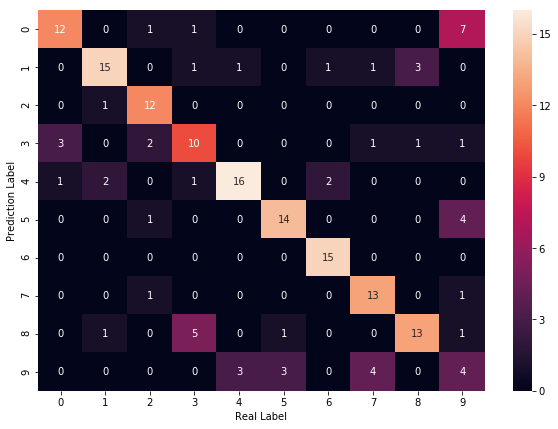

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:1 index:[5] real:5
#1 min_error:1 index:[3] real:2
#2 min_error:1 index:[1] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:1 index:[1 4] real:1
#5 min_error:3 index:[7 9] real:7
#6 min_error:1 index:[4] real:6
#7 min_error:1 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:0 index:[1] real:1
#10 min_error:2 index:[9] real:7
#11 min_error:3 index:[9] real:4
#12 min_error:1 index:[6] real:6
#13 min_error:0 index:[3] real:3
#14 min_error:0 index:[1] real:1
#15 min_error:2 index:[0 3] real:3
#16 min_error:2 index:[7 9] real:9
#17 min_error:0 index:[1] real:1
#18 min_error:1 index:[9] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:1 index:[1] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:0 index:[1] real:1
#24 min_error:1 index:[4] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:1 index:[5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:2 index:[1 4] real:6
#29 min_error:2 index:[0 9] real:9
#30 min_

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.7217068645640075
Avg Base Learner:0.8541125541125542


In [20]:
from random import randint

list_acc = []

for iii in range(11):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.10555555555555556
Accuracy on training set: 0.16111111111111112
Accuracy on training set: 0.32222222222222224
Accuracy on training set: 0.3888888888888889
Accuracy on training set: 0.5055555555555555
Accuracy on training set: 0.5388888888888889
Accuracy on training set: 0.5944444444444444
Accuracy on training set: 0.5611111111111111
Accuracy on training set: 0.5888888888888889
Accuracy on training set: 0.6722222222222223
Accuracy on training set: 0.6722222222222223


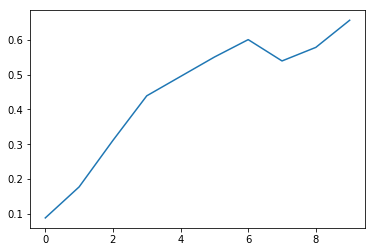

In [17]:
plt.plot(range(10),list_acc)
plt.show()

In [21]:
list_acc

[0.10555555555555556,
 0.16111111111111112,
 0.32222222222222224,
 0.3888888888888889,
 0.5055555555555555,
 0.5388888888888889,
 0.5944444444444444,
 0.5611111111111111,
 0.5888888888888889,
 0.6722222222222223,
 0.6722222222222223]